# Assignment 2

Download the ipynb file and implement

## Installing required libraries

* Librosa
* Numpy
* Matplotlib
* Scikit-learn

In [2]:
!pip install ipykernel librosa numpy matplotlib scikit-learn joblib pandas seaborn

## Importing Libraries
* `os` and `glob`: For file handling and pattern matching.
* `librosa`: For audio processing and feature extraction.
* `numpy`: For numerical operations.
* `pandas`: For data manipulation (not used in this script but commonly used in similar projects).
* `matplotlib.pyplot`: For plotting and visualizing features.
* `sklearn modules`: For machine learning tasks

In [3]:
  import os
  import glob
  import librosa
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn.preprocessing import LabelEncoder, StandardScaler
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  import joblib

 ## Defining Emotions and Observed Emotions

* `emotions`: A dictionary mapping emotion codes to their descriptive names.
* `observed_emotions`: A list of emotions we want to recognize and classify.

In [4]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

observed_emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

##  Feature Extraction Function

* Refer to the following link for feature extraction functions: https://librosa.org/doc/main/feature.html

* `librosa.load`: Loads the audio file and returns the audio time series (y) and the sampling rate (sr).
* `np.array([])`: Initializes an empty numpy array to hold features.

#### MFCC(Mel-Frequency Cepstral Coefficient):
* `librosa.feature.mfcc`: Extracts MFCCs from the audio signal.
* `np.mean(..., axis=0)`: Averages MFCCs over time.
* `np.hstack`: Horizontally stacks features into a single array.

#### Chromagram:
* `librosa.stft`: Computes the Short-Time Fourier Transform (STFT) of the audio signal.
* `librosa.feature.chroma_stft`: Computes the chromagram (a representation of the 12 pitch classes).

#### Mel-scaled Spectrogram:
* `librosa.feature.melspectrogram`: Computes the mel-scaled spectrogram.

#### Spectral Contrast:
* `librosa.feature.spectral_contrast`: Computes the spectral contrast, which describes the difference in amplitude between peaks and valleys in the sound spectrum.

#### Tonnetz:
* `librosa.feature.tonnetz`: Computes the Tonnetz features, which capture tonal centroid features from harmonic signal.

In [5]:
def extract_features(file_name):
    y, sr = librosa.load(file_name, sr=None)
    features = np.array([])

    # Extract MFCC
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    features = np.hstack((features, mfccs))

    # Extract Chromagram
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features, chroma))

    # Extract Mel-scaled spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    features = np.hstack((features, mel))

    # Extract Spectral Contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features, contrast))

    # Extract Tonnetz (Tonal Centroid)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
    features = np.hstack((features, tonnetz))

    return features

## Feature Analysis - Section Specific Task
* Extract features of dataset without balancing dataset
* Get emotion labels of all instances in dataset `(numpy array)`
* Get dimension and list for each of the classes
* Create a .csv of entire dataset and extracted features with emotion column (label)
* Perform class-wise graphical analysis of dataset
* .csv file has to be submitted



In [2]:
def parse_emotion_from_filename(filename):
    # Extracting the emotion code from the filename (third part)
    emotion_code = filename.split('-')[2]
    return emotions[emotion_code]

# Function to save features to CSV
def save_features_to_csv(directory_path, csv_filename):
    features_list = []
    emotion_labels = []

    # Traverse the directory and extract features from each .wav file
    for actor_folder in os.listdir(directory_path):
        actor_path = os.path.join(directory_path, actor_folder)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith('.wav'):
                    file_path = os.path.join(actor_path, file)
                    # Extract emotion label from filename
                    emotion_label = parse_emotion_from_filename(file)
                    emotion_labels.append(emotion_label)

                    # Extract features and append to features_list
                    features = extract_features(file_path)
                    features_list.append(features)

                    # Limit to first 5 entries
                    if len(features_list) >= 5:
                        break
            if len(features_list) >= 5:
                break

    # Create a DataFrame and save to CSV if we have features
    if features_list and emotion_labels:
        features_array = np.array(features_list)
        emotion_labels_array = np.array(emotion_labels)

        # Combine features and labels into a single DataFrame
        df = pd.DataFrame(features_array)
        df['emotion'] = emotion_labels_array
        df.to_csv(csv_filename, index=False)

# Example usage
directory_path = 'Student/speech-emotion-recognition-ravdess-data'
csv_filename = 'emotion_features_dataset.csv'

# Call the function to save features to CSV
save_features_to_csv(directory_path, csv_filename)


NameError: name 'os' is not defined

In [7]:
def save_features_to_csv(directory_path, csv_filename):
    features_list = []
    emotion_labels = []
    entry_count = 0  # Counter for the number of entries processed

    # Traverse the directory and extract features from each .wav file
    for actor_folder in os.listdir(directory_path):
        actor_path = os.path.join(directory_path, actor_folder)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith('.wav') and entry_count < 5:  # Process only the first 5 entries
                    file_path = os.path.join(actor_path, file)

                    # Debug: Print the file being processed
                    print(f'Processing file: {file_path}')

                    # Extract emotion label from filename
                    try:
                        emotion_label = parse_emotion_from_filename(file)
                        emotion_labels.append(emotion_label)
                    except KeyError:
                        print(f'Emotion code not found in {file}. Skipping.')
                        continue
                    
                    # Extract features and append to features_list
                    features = extract_features(file_path)
                    features_list.append(features)
                    entry_count += 1  # Increment the counter

                    # Debug: Print the emotion label and entry count
                    print(f'Emotion: {emotion_label}, Entries Processed: {entry_count}')

    # Create a DataFrame and save to CSV if there are entries
    if features_list:
        features_array = np.array(features_list)
        emotion_labels_array = np.array(emotion_labels)

        # Combine features and labels into a single DataFrame
        df = pd.DataFrame(features_array)
        df['emotion'] = emotion_labels_array
        df.to_csv(csv_filename, index=False)

        print(f'Saved {entry_count} entries to {csv_filename}.')
    else:
        print('No features to save.')

# Example usage
directory_path = 'Student/speech-emotion-recognition-ravdess-data'
csv_filename = 'emotion_features_dataset.csv'

# Call the function to save features to CSV for the first 5 entries
save_features_to_csv(directory_path, csv_filename)
#Student/speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav

Processing file: Student/speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-01-01.wav
Emotion: neutral, Entries Processed: 1
Processing file: Student/speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-02-01.wav
Emotion: neutral, Entries Processed: 2
Processing file: Student/speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-02-01-01.wav
Emotion: neutral, Entries Processed: 3
Processing file: Student/speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-02-02-01.wav
Emotion: neutral, Entries Processed: 4
Processing file: Student/speech-emotion-recognition-ravdess-data\Actor_01\03-01-02-01-01-01-01.wav
Emotion: calm, Entries Processed: 5
Saved 5 entries to emotion_features_dataset.csv.


In [8]:
def fetch_data():
    features, labels = [], []
    for wav_file in glob.glob("Student/speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name = os.path.basename(wav_file)
        name_parts = file_name.split('-')
        emotion_code = name_parts[2]
        emotion_name = emotions[emotion_code]
        if emotion_name not in observed_emotions:
            continue
        extracted_features = extract_features(wav_file)
        features.append(extracted_features)
        labels.append(emotion_name)

    features = np.array(features)
    feature_dataframe = pd.DataFrame(features)
    feature_dataframe['emotion'] = labels
    feature_dataframe.to_csv("emotion_features_dataset.csv", index=False)
    print("CSV file saved as 'emotion_features_dataset.csv'")

fetch_data()

CSV file saved as 'emotion_features_dataset.csv'


ValueError: x and y must be the same size

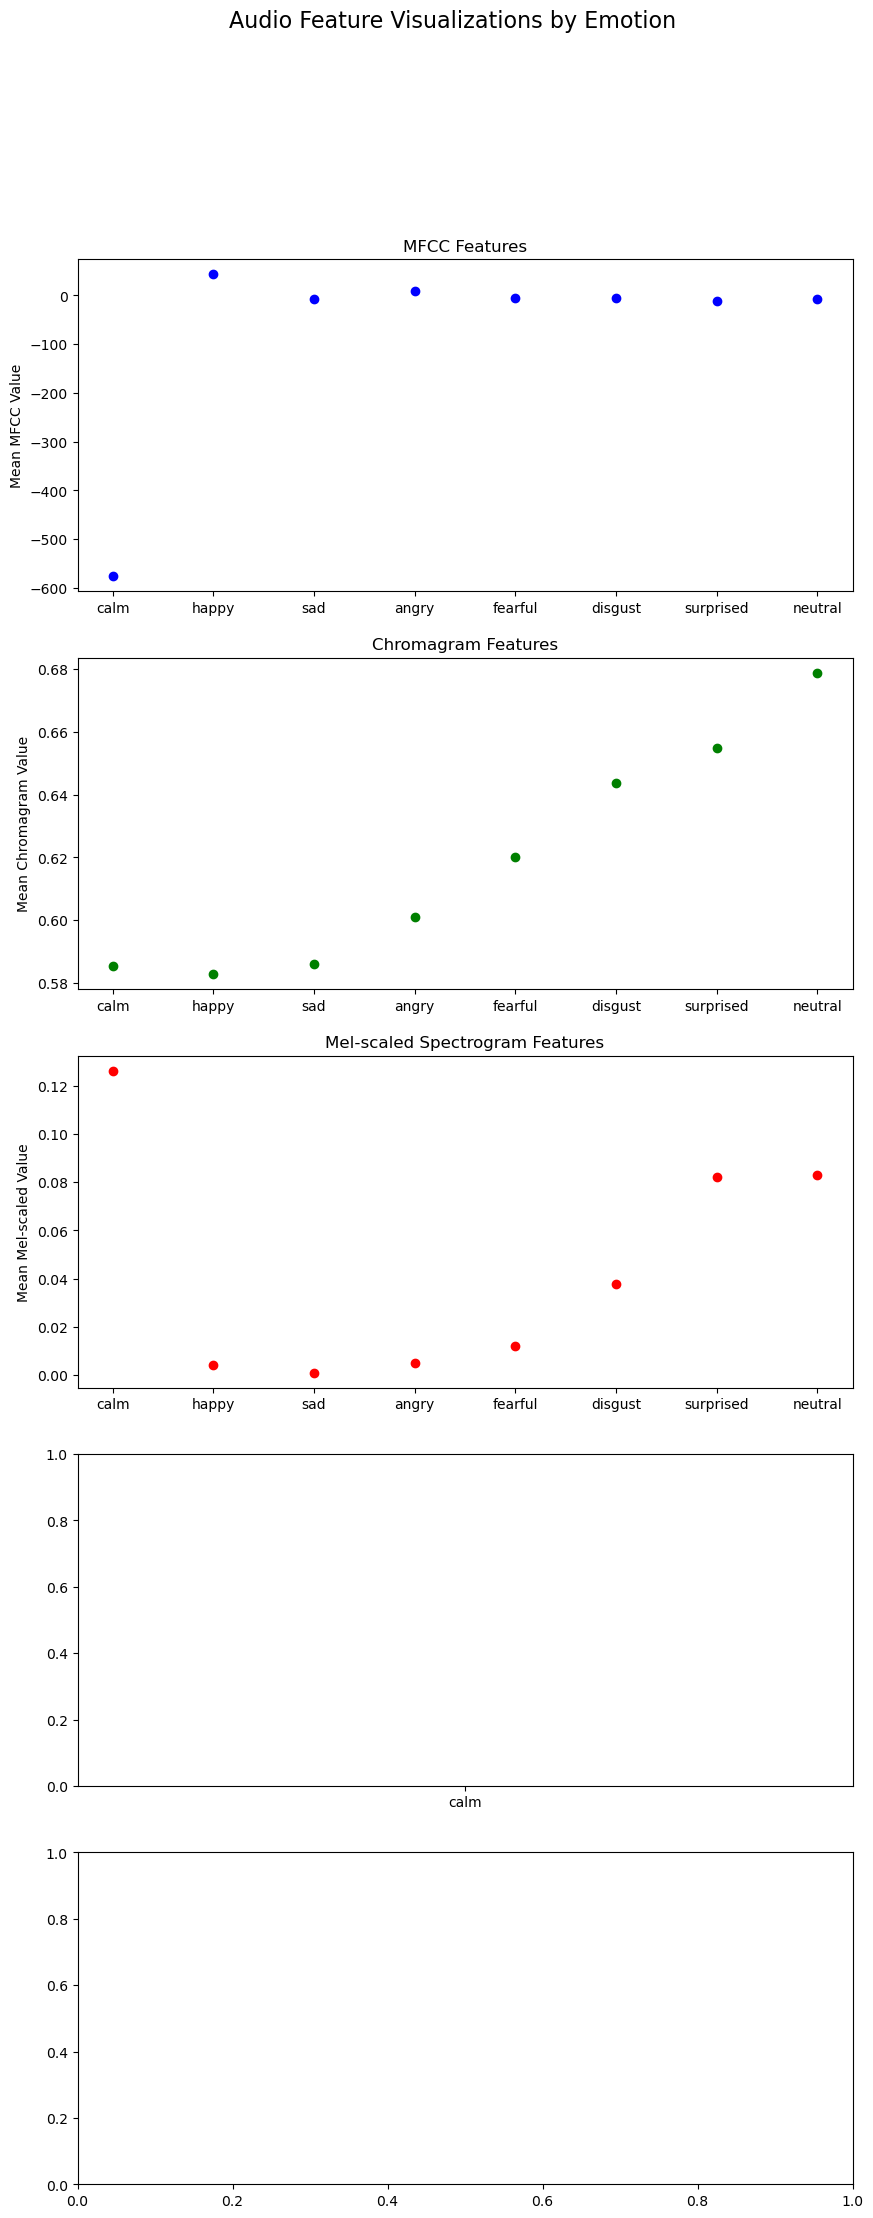

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
csv_filename = "emotion_features_dataset.csv"
data = pd.read_csv(csv_filename)

# Extract features based on specified ranges
mfcc_features = data.iloc[:, :13].mean(axis=0).values
chroma_features = data.iloc[:, 13:25].mean(axis=0).values
mel_features = data.iloc[:, 25:125].mean(axis=0).values
spectral_contrast_features = data.iloc[:, 125:132].mean(axis=0).values
tonnetz_features = data.iloc[:, 132:138].mean(axis=0).values

# Define emotion labels (x values)
emotion_labels = data['emotion'].value_counts().index.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 25))
fig.suptitle('Audio Feature Visualizations by Emotion', fontsize=16)

# Plot MFCC features
axes[0].scatter(emotion_labels, mfcc_features[:len(emotion_labels)], color='b')
axes[0].set_title('MFCC Features')
axes[0].set_ylabel('Mean MFCC Value')

# Plot Chromagram features
axes[1].scatter(emotion_labels, chroma_features[:len(emotion_labels)], color='g')
axes[1].set_title('Chromagram Features')
axes[1].set_ylabel('Mean Chromagram Value')

# Plot Mel-scaled spectrogram features
axes[2].scatter(emotion_labels, mel_features[:len(emotion_labels)], color='r')
axes[2].set_title('Mel-scaled Spectrogram Features')
axes[2].set_ylabel('Mean Mel-scaled Value')

# Plot Spectral Contrast features
axes[3].scatter(emotion_labels, spectral_contrast_features[:len(emotion_labels)], color='c')
axes[3].set_title('Spectral Contrast Features')
axes[3].set_ylabel('Mean Spectral Contrast Value')

# Plot Tonnetz features
axes[4].scatter(emotion_labels, tonnetz_features[:len(emotion_labels)], color='m')
axes[4].set_title('Tonnetz Features')
axes[4].set_ylabel('Mean Tonnetz Value')

# Adjust layout
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Loading and Balancing the Dataset

* `glob.glob`: Finds all .wav files in the specified directory.
* **Feature extraction**: For each file, extract features and append them to x, and the emotion label to y.


 **Balancing the dataset**:
* **Count samples**: Determine how many samples exist for each emotion.
* **Determine minimum samples**: Find the emotion with the fewest samples.
* **Select samples**: Ensure an equal number of samples for each emotion to avoid bias.


* `train_test_split`: Splits the balanced dataset into training and testing sets.


##### NOTE: Navigate to the folder that contains the dataset and add the suffix expression as shown in the code cell below.

In [10]:
def load_data(test_size):
    x, y = [], []
    for file in glob.glob("Student\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):   # Set your path
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_features(file)
        x.append(feature)
        y.append(emotion)

    # Balance the dataset
    min_samples = min([y.count(emotion) for emotion in observed_emotions])
    balanced_x, balanced_y = [], []

    for emotion in observed_emotions:
        count = 0
        for i in range(len(y)):
            if y[i] == emotion and count < min_samples:
                balanced_x.append(x[i])
                balanced_y.append(y[i])
                count += 1

    return train_test_split(np.array(balanced_x), balanced_y, test_size=test_size, random_state=9)


#### Split the data into train and test

In [11]:
# Call the load_data function with test_size set to 0.2 (80% training, 20% testing)
x_train, x_test, y_train, y_test = load_data(test_size=0.2)



## Feature Visualization

Plot the following features using `matplotlib`:
* **MFCC**: the mean of MFCC features.
* **Chromagram**: the mean of Chromagram features.
* **Mel-scaled spectrogram**: the mean of Mel-scaled spectrogram features.
* **Spectral Contrast**: the mean of Spectral Contrast features.
* **Tonnetz**: the mean of Tonnetz features.

## Range of the Indices after Feature Extraction
* `x[:, :13]` - MFCC features (13 features)
* `x[:, 13:25]` - Chromagram features (12 features)
* `x[:, 25:125]` - Mel-scaled spectrogram features (100 features) (The number of Mel bands can vary, but here we assume 100 Mel bands for illustration)
* `x[:, 125:132]` - Spectral contrast features (7 features)
* `x[:, 132:138]` - Tonnetz features (6 features)

In [109]:
# Function to plot features
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
def plot_features(features, title):
    plt.figure(figsize=(10, 4))
    plt.plot(features)
    plt.title(title)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.show()

# Visualize each type of feature
# Visualize each type of feature
def visualize_features(x, feature_name):
    # Extract MFCC (first 13 features)
    mfccs = x[:, :13]
    plot_features(np.mean(mfccs, axis=0), f"{feature_name} - MFCC")

    # Extract Chromagram (next 12 features: 13-25)
    chroma = x[:, 13:25]
    plot_features(np.mean(chroma, axis=0), f"{feature_name} - Chromagram")

    # Extract Mel-scaled spectrogram (next 100 features: 25-125)
    mel = x[:, 25:125]
    plot_features(np.mean(mel, axis=0), f"{feature_name} - Mel-scaled Spectrogram")

    # Extract Spectral Contrast (next 7 features: 125-132)
    contrast = x[:, 125:132]
    plot_features(np.mean(contrast, axis=0), f"{feature_name} - Spectral Contrast")

    # Extract Tonnetz (next 6 features: 132-138)
    tonnetz = x[:, 132:138]
    plot_features(np.mean(tonnetz, axis=0), f"{feature_name} - Tonnetz")


x_train_scaled shape: (614, 166)
y_train_encoded shape: (492,)


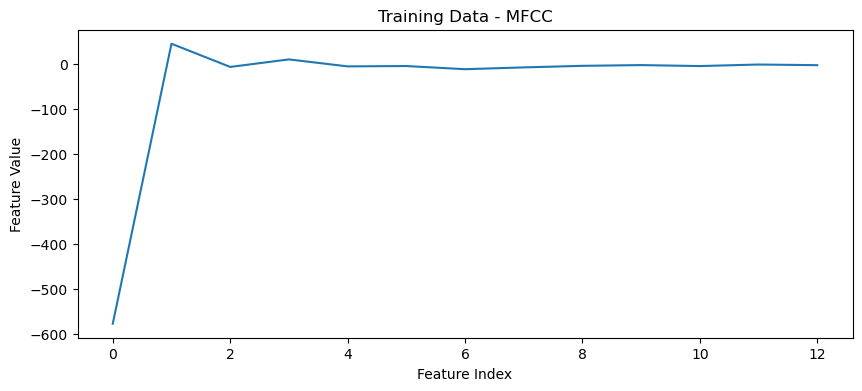

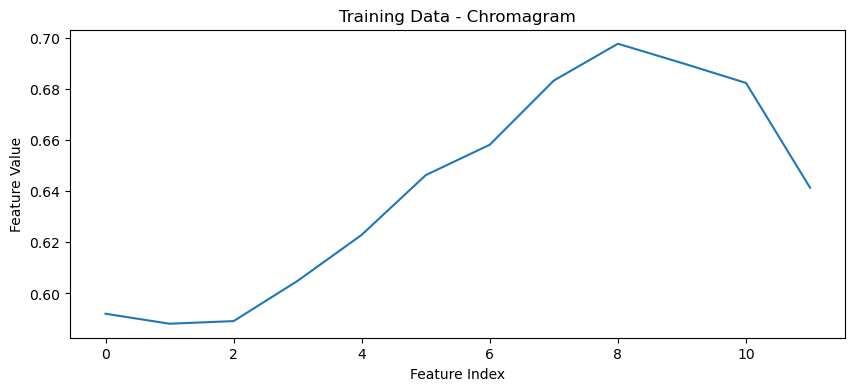

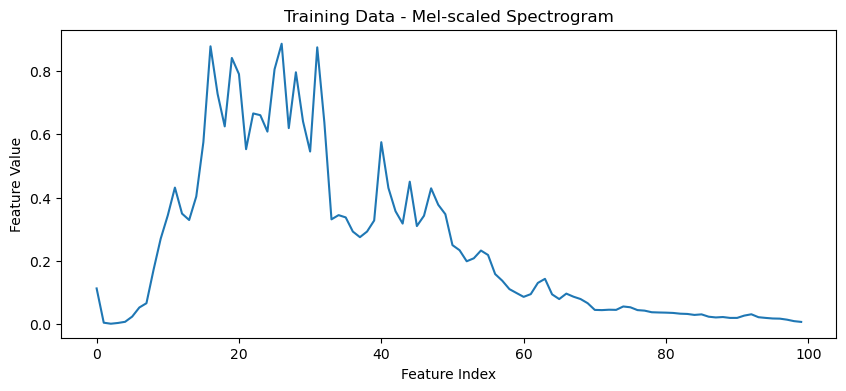

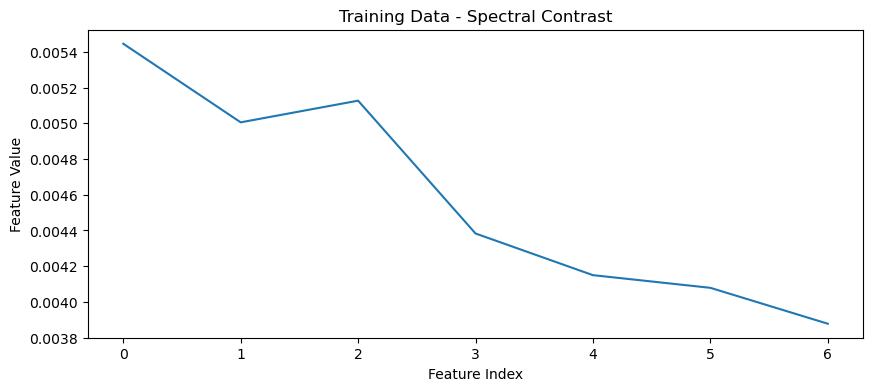

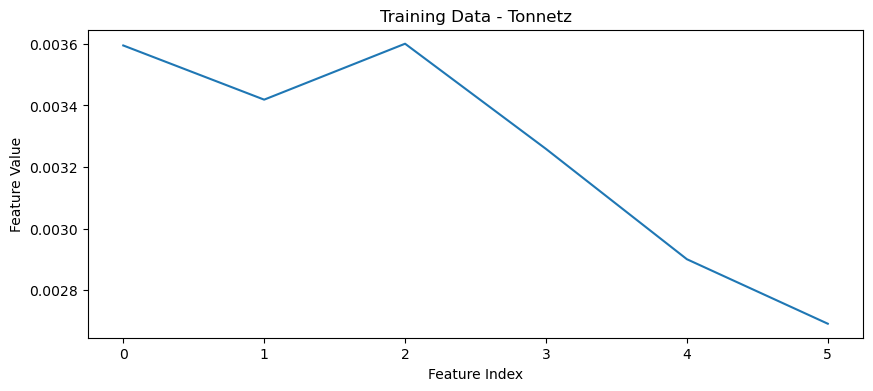

In [13]:
visualize_features(x_train, "Training Data")

## Encoding Labels and Standardizing Features

#### Label Encoding:
* **LabelEncoder**: Converts emotion labels from strings to numerical values.

#### Standardization:
* **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, which improves model performance.

In [108]:
# Code your implementation here
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

def relabel_emotions(emotion_labels):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(emotion_labels)
    return encoded_labels, encoder

y_train_encoded, encoder = relabel_emotions(y_train)
y_test_encoded = encoder.transform(y_test)  

# print(y_test_encoded)


# Standardize the features
def standardize_features(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)  # Use the same scaler to transform test data
    return x_train_scaled, x_test_scaled, scaler

# Call the standardization function
x_train_scaled, x_test_scaled, scaler = standardize_features(x_train, x_test)

# Now, x_train_scaled and x_test_scaled are standardized


# Use the same encoder to transform test labels

# print("Training data shape:", x_train.shape)
# print("Test data shape:", x_test.shape)
# print("Encoded training labels:", y_train_encoded)
# print("Encoded test labels:", y_test_encoded)

# def print_training_set(x_train, y_train_encoded):
#     print("Training Set:")
#     print("Features (x_train):")
#     for i, features in enumerate(x_train):
#         print(f"Sample {i+1}: {features}")
    
#     print("\nEncoded Labels (y_train):")
#     for i, label in enumerate(y_train_encoded):
#         print(f"Sample {i+1}: {label}")
# print_training_set(len(x_train),len(y_train_encoded))

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")



x_train_scaled shape: (614, 166)
y_train_encoded shape: (492,)


## Buliding the MLP Model

#### MLPClassifier:
* `hidden_layer_sizes`: Defines the architecture of the MLP with three layers of 256, 128, and 64 neurons respectively.
* `activation`: Uses the ReLU activation function.
* `solver`: Uses Adam optimizer.
* `max_iter`: Sets the maximum number of iterations for training.

#### Training and Evaluation:
* `mlp.fit`: Trains the model on the scaled training data.
* `mlp.score`: Evaluates the model’s accuracy on the test data.

In [107]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

# Define the MLP model
def create_mlp_model():
    mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64),
                        activation='relu',
                        solver='adam',
                        max_iter=500,  # You can adjust this as needed
                        random_state=9)  # For reproducibility
    return mlp

# Create the model
mlp_model = create_mlp_model()

# Train the model on the scaled training data
mlp_model.fit(x_train_scaled, y_train_encoded)

# Evaluate the model's accuracy on the test data using mlp.score
accuracy_score_mlp = mlp_model.score(x_test_scaled, y_test_encoded)

ValueError: Found input variables with inconsistent numbers of samples: [614, 492]

#### Saving and Loading the Model
* **Saving the model**: By using `joblib.dump`, you store the trained model to a file, which can be reused later. This is useful for persisting models after training, allowing you to avoid retraining each time you want to use the model.
* **Loading the model**: By using `joblib.load`, you retrieve the stored model from the file and load it into your program, making it available for making predictions or further evaluations.

In [29]:

# Save the model to a file
model_filename = 'mlp_model.joblib'
joblib.dump(mlp_model, model_filename)

print(f"Model saved to {model_filename}")
# Load the model from the file
loaded_model = joblib.load(model_filename)

print(f"Model loaded from {model_filename}")

# Use the loaded model to make predictions
# loaded_model_accuracy = loaded_model.score(x_test_scaled, y_test_encoded)
# print(f"Accuracy of the loaded model on test data: {loaded_model_accuracy:.2f}")

print(f'Shape of x_train_scaled: {x_train_scaled.shape}')
print(f'Shape of y_train_encoded: {y_train_encoded.shape}')



Model saved to mlp_model.joblib
Model loaded from mlp_model.joblib
Shape of x_train_scaled: (614, 166)
Shape of y_train_encoded: (492,)


## Fine Tuning HParams

* There are many ways of doing this, but we shall see RandomSearchCV.

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64, 128],
    'max_iter': [200, 500, 1000]
}

mlp = MLPClassifier(random_state=9)

random_search_model = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=50, n_jobs=-1, cv=3, verbose=2, random_state=9)

random_search_model.fit(x_train_scaled, y_train_encoded)

print("Best parameters found: ", random_search_model.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [614, 492]

In [31]:
best_model = random_search_model.best_estimator_

accuracy = best_model.score(x_test_scaled, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

ValueError: Found input variables with inconsistent numbers of samples: [122, 154]

In [32]:
joblib.dump(best_model, 'mlp_emotion_classifier_best_model2.joblib')
print("Best MLP model found and saved successfully.")

Best MLP model found and saved successfully.


In [33]:
best_model = joblib.load('mlp_emotion_classifier_best_model2.joblib')
print("Model Loaded successfully")

Model Loaded successfully


## Make Predictions with both models


In [39]:
mlp.fit(x_train_scaled, y_train_encoded)
# Code your implementation here
y_pred = loaded_model.predict(x_test_scaled)  # MLP predictions
y_pred_best = best_model.predict(x_test_scaled)

ValueError: Found input variables with inconsistent numbers of samples: [614, 492]

## Metrics

* What are metrics and why do we need them?
    * Metrics are basically measures of how good your model actually is.
    * They can be used for comparative studies between multiple trials at training a model and also checking for any False Positive and False Negative outputs which can affect the `precision` and `F1-Scores`.
    * There are various types but here, we will be using 3 metrics and these are quite common for Machine Learning Models. They are:
        * Precision
        * Recall
        * F1 Score
    * Formulae for all are mentioned above and all the values for `TP(True Positive)`, `FP(False Positive)`, `TN(True Negative)` and `FN(False Negative)` are obtained from the `confusion matrix`.


In [3]:
# Code your implementation here - Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_encoded, y_pred)
cm_best = confusion_matrix(y_test_encoded, y_pred_best)

# print(f'Length of y_test_encoded: {len(y_test_encoded)}')
# print(f'Length of y_pred_best: {len(y_pred_best)}')
# print(f'Length of y_pred_kfold: {len(y_pred_kfold)}')




NameError: name 'y_test_encoded' is not defined

Now, evaluate for both the models. The initial `mlp` model and also for the `best_model` found by HParam tuning using Classification Reports.

In [59]:
# Code your implementation here - Classification reports
import seaborn as sns
y_test_binary = np.where(y_test_encoded > 0, 1, 0)
y_pred_binary = np.where(y_pred_best > 0, 1, 0)

# Calculate the binary confusion matrix
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Display the binary confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Overall Confusion Matrix for Emotion Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

y_test_binary = np.where(y_test_encoded > 0, 1, 0)
y_pred_binary2 = np.where(y_pred > 0, 1, 0)

# Calculate the binary confusion matrix
conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary2)

# Display the binary confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Overall Confusion Matrix for Emotion Classification MODEL1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





from sklearn.metrics import precision_score, recall_score, f1_score

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = conf_matrix_binary.ravel()

# Calculate Precision, Recall, and F1 Score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Alternatively, using sklearn's built-in functions for convenience
# precision = precision_score(y_test_binary, y_pred_binary)
# recall = recall_score(y_test_binary, y_pred_binary)
# f1 = f1_score(y_test_binary, y_pred_binary)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

ValueError: Found input variables with inconsistent numbers of samples: [122, 154]

## K-Fold Cross Validation

* K-Fold cross-validation is a statistical method used to evaluate the performance of a machine learning model.
* It involves partitioning the original dataset into `K subsets` or `folds`.

In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import joblib

# Load your model
best_model = joblib.load('mlp_emotion_classifier_best_model2.joblib')

# Assuming x_data is your feature data and y_data is your true labels
x_data = x_train_scaled  # Replace this witAh your actual features
y_data = y_train_encoded  # Replace this with your actual labels

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []
y_pred_kfold = []  # To store predictions from each fold

for train_index, test_index in kf.split(x_data):
    X_train, X_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    # Fit the model
    best_model.fit(X_train, y_train)
    
    # Predict
    y_pred = best_model.predict(X_test)
    
    # Store predictions for this fold
    y_pred_kfold.extend(y_pred)  # Append predictions for this fold
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Print overall metrics
print(f'Overall Accuracy: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}')
print(f'Overall Precision: {np.mean(precisions):.2f} ± {np.std(precisions):.2f}')
print(f'Overall Recall: {np.mean(recalls):.2f} ± {np.std(recalls):.2f}')
print(f'Overall F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}')

# Convert the predictions to a numpy array for further analysis
y_pred_kfold = np.array(y_pred_kfold)


Overall Accuracy: 0.58 ± 0.04
Overall Precision: 0.59 ± 0.05
Overall Recall: 0.58 ± 0.04
Overall F1 Score: 0.58 ± 0.04


## Now, Let's perform a comparitive study

* Use Accuracy, Classification Reports and Confusion Matrices to compare your models.
* When it comes to the syntax of importing a model and using it, they all look nearly the same to sight.

### MLP

In [83]:
# lculate metrics for the MLP model
precision_best, recall_best, f1_best = calculate_metrics(y_test_encoded, y_pred_best)

# Calculate metrics for the K-Fold model
precision_kfold, recall_kfold, f1_kfold = calculate_metrics(y_test_encoded, y_pred_kfold)

# Display the results
print("Best MLP Model Metrics:")
print(f"Precision: {precision_best:.2f}, Recall: {recall_best:.2f}, F1 Score: {f1_best:.2f}")

print("\nK-Fold Model Metrics:")
print(f"Precision: {precision_kfold:.2f}, Recall: {recall_kfold:.2f}, F1 Score: {f1_kfold:.2f}")

# Calculate confusion matrices
conf_matrix_best = confusion_matrix(y_test_encoded, y_pred_best)
conf_matrix_kfold = confusion_matrix(y_test_encoded, y_pred_kfold)

# Display confusion matrices
print("\nConfusion Matrix for Best MLP Model:")
print(conf_matrix_best)

print("\nConfusion Matrix for K-Fold Model:")
print(conf_matrix_kfold)

ValueError: Found input variables with inconsistent numbers of samples: [122, 154]

### SVM Classifier => Support Vector Machine

* A link has been attached for your reference below. It explains the basics of SVM very well.

* In short, A `Support Vector Machine` (SVM) is a powerful `classification` algorithm that finds the optimal boundary, known as the hyperplane, which best separates data points of different classes. It uses two support vectors which are critical data points closest to the boundary, which define and maximize the boundary. This ensures that an optimal boundary is set so that it can separate the two classes accurately.

* https://www.geeksforgeeks.org/support-vector-machine-algorithm/

In [ ]:
# Code your implementation here - use multiple cells when required

### KNN Classifier

* K-Nearest Neighbors, is also another Supervised Classification algorithm. Basically, we define the number of neighbors first, then find the distances of the upcoming points from the rest of the points. Then, segregate the points after finding the `lowest distance`. Distances are of many types but the common ones are Euclidean, Manhattan, and Minkowski distances.

* Then, we will find the new centroid (collective centroid) of that cluster and start from there again, till all the values are covered.

* Note: Don't confuse this with K-Means clustering, which is an Unsupervised Algorithm.

In [ ]:
# Code your implementation here - use multiple cells when required